<a href="https://colab.research.google.com/github/pb6400/Chennai_house_price_Predicton/blob/main/Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib 


In [ ]:
df1=pd.read_csv('/content/train-chennai-sale.csv',encoding= 'unicode_escape')

In [ ]:
df1.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
df1.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [ ]:
df1.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [ ]:
df2=df1.drop(columns=['QS_ROOMS','QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL'])

In [ ]:
df2.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [ ]:
df2.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,983922.000000,495405.000000,2.366734e+07


# Data Cleaning

In [ ]:
df2.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        1
N_BATHROOM       5
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [ ]:
df3=df2.dropna(how='any')

In [ ]:
df3.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,237000,74063,7406250


In [ ]:
df3.isna().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [ ]:
df4=df3

In [ ]:
df4.N_BATHROOM[round(df4.N_BATHROOM)]

1.0    1.0
1.0    1.0
1.0    1.0
2.0    1.0
1.0    1.0
      ... 
1.0    1.0
2.0    1.0
1.0    1.0
1.0    1.0
2.0    1.0
Name: N_BATHROOM, Length: 7103, dtype: float64

In [ ]:
df4.N_BATHROOM[df4.N_BATHROOM%1>0]

Series([], Name: N_BATHROOM, dtype: float64)

# Corelation

In [ ]:
hm_df=df2.corr()

In [ ]:
hm_df

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,REG_FEE,COMMIS,SALES_PRICE
INT_SQFT,1.000000,0.002022,0.786348,0.515390,0.951279,0.657544,0.571076,0.612125
DIST_MAINROAD,0.002022,1.000000,-0.002566,0.001970,0.002301,0.011600,0.010994,0.018783
N_BEDROOM,0.786348,-0.002566,1.000000,0.755214,0.840286,0.455357,0.430424,0.330999
N_BATHROOM,0.515390,0.001970,0.755214,1.000000,0.568688,0.260324,0.256533,0.108884
N_ROOM,0.951279,0.002301,0.840286,0.568688,1.000000,0.630932,0.533343,0.602760
REG_FEE,0.657544,0.011600,0.455357,0.260324,0.630932,1.000000,0.659903,0.878148
COMMIS,0.571076,0.010994,0.430424,0.256533,0.533343,0.659903,1.000000,0.626275
SALES_PRICE,0.612125,0.018783,0.330999,0.108884,0.602760,0.878148,0.626275,1.000000


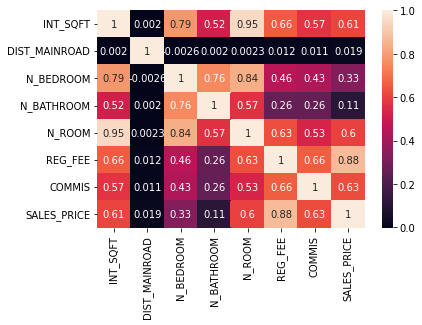

In [ ]:
sns.heatmap(hm_df,annot=True)

# Plotting


In [ ]:
import seaborn as sns

In [ ]:
import plotly.express as px

In [ ]:
df4.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,237000,74063,7406250


In [ ]:
df4.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,REG_FEE,COMMIS,SALES_PRICE
count,7103.000000,7103.000000,7103.000000,7103.00000,7103.000000,7103.000000,7103.000000,7.103000e+03
mean,1382.117556,99.578629,1.637336,1.21329,3.688723,376952.707588,141055.364212,1.089477e+07
std,457.484517,57.399230,0.803030,0.40966,1.019299,143088.109006,78775.875689,3.769549e+06
min,500.000000,0.000000,1.000000,1.00000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.00000,3.000000,272469.000000,84252.500000,8.270900e+06
50%,1373.000000,99.000000,1.000000,1.00000,4.000000,349509.000000,127644.000000,1.033464e+07
75%,1744.000000,148.000000,2.000000,1.00000,4.000000,451544.500000,184534.000000,1.299422e+07
max,2500.000000,200.000000,4.000000,2.00000,6.000000,983922.000000,495405.000000,2.366734e+07


<BarContainer object of 7109 artists>

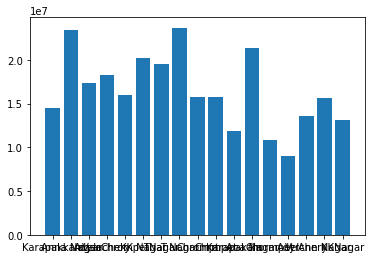

In [ ]:
plt.bar(df2['AREA'],df2['SALES_PRICE'])

(array([690., 712., 689., 753., 731., 741., 685., 709., 667., 732.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <a list of 10 Patch objects>)

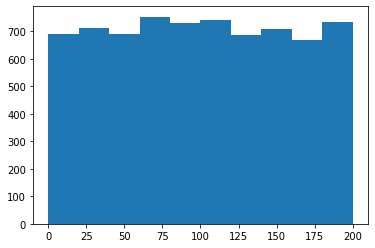

In [ ]:
plt.hist(df2['DIST_MAINROAD'])

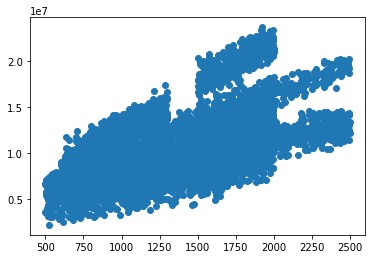

In [ ]:
plt.scatter(df3['INT_SQFT'],df3['SALES_PRICE'])

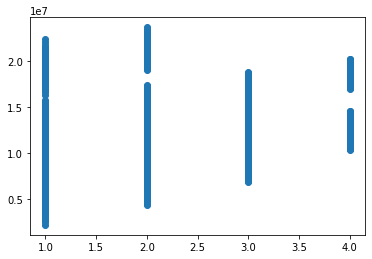

In [ ]:
plt.scatter(df3['N_BEDROOM'],df3['SALES_PRICE'])

(array([2325.,    0., 2305.,    0.,    0.,   26.,    0., 2443.,    0.,
           4.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

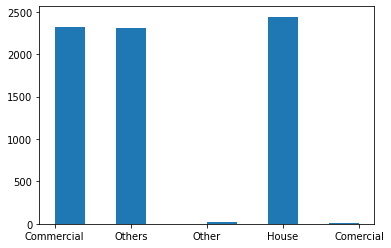

In [ ]:
plt.hist(df4['BUILDTYPE'])

In [ ]:
df4.BUILDTYPE[df4['BUILDTYPE']=='Other']='Others'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df4.BUILDTYPE[df4['BUILDTYPE']=='Other']

Series([], Name: BUILDTYPE, dtype: object)

In [ ]:
df4.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House', 'Comercial'], dtype=object)

In [ ]:
df4.BUILDTYPE[df4['BUILDTYPE']=='Comercial']='Commercial'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df4.BUILDTYPE[df4['BUILDTYPE']=='Comercial']

Series([], Name: BUILDTYPE, dtype: object)

(array([2329.,    0.,    0.,    0.,    0., 2331.,    0.,    0.,    0.,
        2443.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

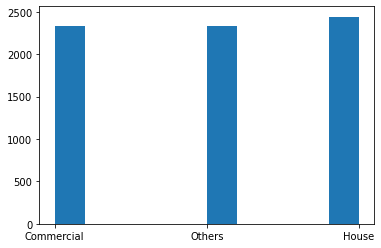

In [ ]:
plt.hist(df4['BUILDTYPE'])

(array([ 537.,    0., 1822.,    0., 1856.,    0.,  525.,    0.,  550.,
        1813.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

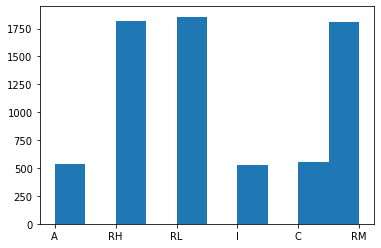

In [ ]:
plt.hist(df4['MZZONE'])

(array([3.584e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.517e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

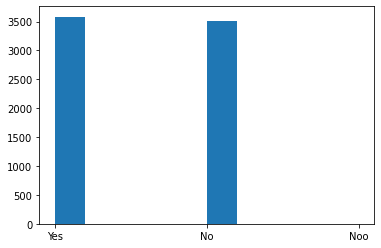

In [ ]:
plt.hist(df4['PARK_FACIL'])

In [ ]:
df4.PARK_FACIL[df4['PARK_FACIL']=='Noo']='No'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df4.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

(array([1.405e+03, 1.402e+03, 1.427e+03, 1.433e+03, 0.000e+00, 1.422e+03,
        5.000e+00, 2.000e+00, 6.000e+00, 1.000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

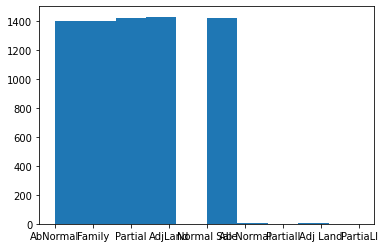

In [ ]:
plt.hist(df4['SALE_COND'])

In [ ]:
df4.SALE_COND[df4['SALE_COND']=='Ab Normal']='AbNormal'
df4.SALE_COND[df4['SALE_COND']=='Partiall']='Partial'
df4.SALE_COND[df4['SALE_COND']=='PartiaLl']='Partial'
df4.SALE_COND[df4['SALE_COND']=='Adj Land']='AdjLand'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/pytho

(array([1410.,    0., 1402.,    0.,    0., 1430.,    0., 1439.,    0.,
        1422.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

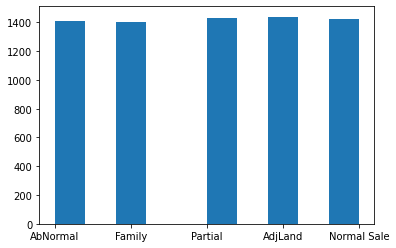

In [ ]:
plt.hist(df4['SALE_COND'])

(array([1.885e+03, 0.000e+00, 1.521e+03, 0.000e+00, 0.000e+00, 1.826e+03,
        0.000e+00, 1.870e+03, 0.000e+00, 1.000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

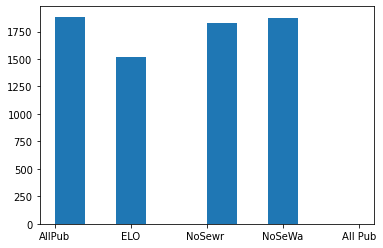

In [ ]:
plt.hist(df4['UTILITY_AVAIL'])

In [ ]:
df4.UTILITY_AVAIL[df4['UTILITY_AVAIL']=='All Pub']='AllPub'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df4.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

(array([2558.,    0., 2518.,    0.,    0., 2008.,    0.,   12.,    0.,
           7.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

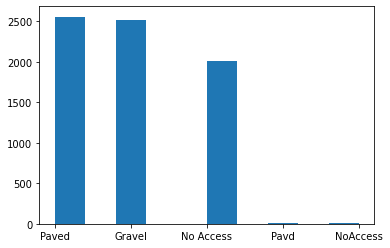

In [ ]:
plt.hist(df4.STREET)

In [ ]:
df4.STREET[df4['STREET']=='Pavd']='Paved'
df4.STREET[df4['STREET']=='NoAccess']='No Access'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([2570.,    0.,    0.,    0.,    0., 2518.,    0.,    0.,    0.,
        2015.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

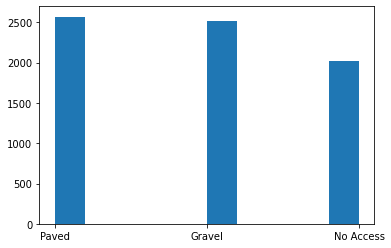

In [ ]:
plt.hist(df4.STREET)

# Feature Engineering

In [ ]:
import pandas as pd
from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta

In [ ]:
df4.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,237000,74063,7406250


In [ ]:
age=pd.DataFrame()
df5=df4

In [ ]:
df5['DATE_BUILD'] = pd.to_datetime(df5['DATE_BUILD'], format='%d-%m-%Y')
df5['DATE_SALE'] = pd.to_datetime(df5['DATE_SALE'], format='%d-%m-%Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df5.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,2011-05-04,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,380000,144400,7600000
1,P09411,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,760122,304049,21717770
2,P01812,Adyar,909,2012-02-04,70,1.0,1.0,3,AbNormal,Yes,1992-02-09,Commercial,ELO,Gravel,RL,421094,92114,13159200
3,P05346,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,356321,77042,9630290
4,P06210,Karapakkam,1226,2009-10-05,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,237000,74063,7406250


In [ ]:
age=pd.DataFrame([relativedelta(a,b).years for a,b in zip(df5['DATE_SALE'],df5['DATE_BUILD'])])

In [ ]:
df5.count()

PRT_ID           7103
AREA             7103
INT_SQFT         7103
DATE_SALE        7103
DIST_MAINROAD    7103
N_BEDROOM        7103
N_BATHROOM       7103
N_ROOM           7103
SALE_COND        7103
PARK_FACIL       7103
DATE_BUILD       7103
BUILDTYPE        7103
UTILITY_AVAIL    7103
STREET           7103
MZZONE           7103
REG_FEE          7103
COMMIS           7103
SALES_PRICE      7103
dtype: int64

In [ ]:
age.describe()

,0
count,7103.000000
mean,23.286639
std,12.342128
min,3.000000
25%,13.000000
50%,22.000000
75%,33.000000
max,54.000000


In [ ]:
df5['age']=age

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df5.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,age
0,P03210,Karapakkam,1004,2011-05-04,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,380000,144400,7600000,43.0
1,P09411,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,760122,304049,21717770,10.0
2,P01812,Adyar,909,2012-02-04,70,1.0,1.0,3,AbNormal,Yes,1992-02-09,Commercial,ELO,Gravel,RL,421094,92114,13159200,19.0
3,P05346,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,356321,77042,9630290,21.0
4,P06210,Karapakkam,1226,2009-10-05,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,237000,74063,7406250,29.0


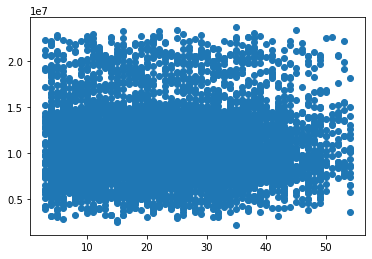

In [ ]:
plt.scatter(df5['age'],df5['SALES_PRICE'])

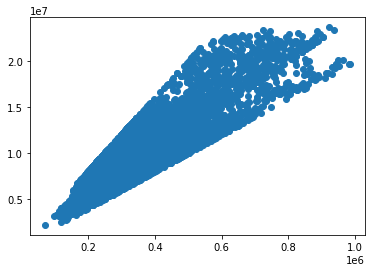

In [ ]:
plt.scatter(df5['REG_FEE'],df5['SALES_PRICE'])

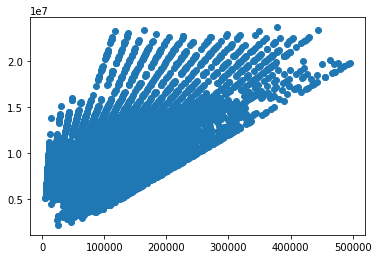

In [ ]:
plt.scatter(df5['COMMIS'],df5['SALES_PRICE'])

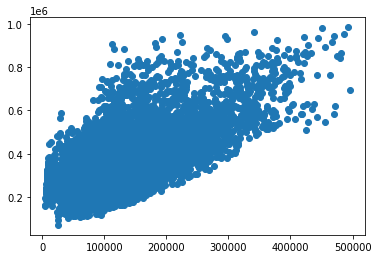

In [ ]:
plt.scatter(df5['COMMIS'],df5['REG_FEE'])

In [ ]:
df6=df5.drop(columns=['DATE_BUILD','DATE_SALE','PRT_ID'])

In [ ]:
df6.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,age
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,380000,144400,7600000,43.0
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,760122,304049,21717770,10.0
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,421094,92114,13159200,19.0
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,356321,77042,9630290,21.0
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,237000,74063,7406250,29.0


In [ ]:
area=pd.DataFrame()

In [ ]:
df6.PARK_FACIL[df6['PARK_FACIL']=='Yes']=1
df6.PARK_FACIL[df6['PARK_FACIL']=='No']=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df6.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [ ]:
df6.STREET[df6['STREET']=='Paved']=2
df6.STREET[df6['STREET']=='Gravel']=1
df6.STREET[df6['STREET']=='No Access']=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
df6.STREET.unique()

array([2, 1, 0], dtype=object)

In [ ]:
df6.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [ ]:
df6.loc[:,'SALE_COND']=df6.SALE_COND.map({'AbNormal':0, 'Family':4, 'Partial':3, 'AdjLand':2, 'Normal Sale':1})

In [ ]:
df6.SALE_COND.unique()

array([0, 4, 3, 2, 1])

In [ ]:
df6.SALE_COND.value_counts()

2    1439
3    1430
1    1422
0    1410
4    1402
Name: SALE_COND, dtype: int64

In [ ]:
df6.isnull().sum()

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
age              6
dtype: int64

In [ ]:
df7=df6.dropna()
df7.isnull().sum()

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
age              0
dtype: int64

In [ ]:
df7.shape

(7097, 16)

In [ ]:
df7.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,age
0,Karapakkam,1004,131,1.0,1.0,3,0,1,Commercial,AllPub,2,A,380000,144400,7600000,43.0
1,Anna Nagar,1986,26,2.0,1.0,5,0,0,Commercial,AllPub,1,RH,760122,304049,21717770,10.0
2,Adyar,909,70,1.0,1.0,3,0,1,Commercial,ELO,1,RL,421094,92114,13159200,19.0
3,Velachery,1855,14,3.0,2.0,5,4,0,Others,NoSewr,2,I,356321,77042,9630290,21.0
4,Karapakkam,1226,84,1.0,1.0,3,0,1,Others,AllPub,1,C,237000,74063,7406250,29.0


In [ ]:
df7.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

In [ ]:
df7.loc[:,'UTILITY_AVAIL']=df7.UTILITY_AVAIL.map({'AllPub':4, 'NoSewr ':3, 'NoSeWa':2, 'ELO':1})

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
df7.UTILITY_AVAIL.value_counts()

4    1886
2    1867
3    1826
1    1518
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
df7.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [ ]:
df7.BUILDTYPE.value_counts()

House         2442
Commercial    2328
Others        2327
Name: BUILDTYPE, dtype: int64

In [ ]:
df7['BUILDTYPE']=df7.BUILDTYPE.map({'Commercial':'3', 'House':'2', 'Others':'1'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df7.BUILDTYPE.value_counts()

2    2442
3    2328
1    2327
Name: BUILDTYPE, dtype: int64

In [ ]:
df7.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [ ]:
df7.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

(array([2140., 1749., 1679., 1001.,  496.,   15.,    6.,    5.,    3.,
           3.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 Patch objects>)

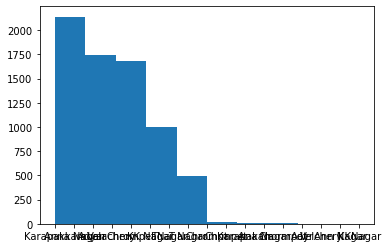

In [ ]:
plt.hist(df7.AREA)

In [ ]:
df8=df7

In [ ]:
df8.AREA.isna().sum()

0

In [ ]:
df8.AREA.value_counts()

Chrompet      1679
Karapakkam    1360
KK Nagar       996
Velachery      976
Anna Nagar     780
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
TNagar           5
Chormpet         5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [ ]:
df8.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
df8.AREA[df8['AREA'] == 'Karapakam']='Karapakkam'
df8.AREA[df8['AREA'] =='Ann Nagar']='Anna Nagar'
df8.AREA[df8['AREA'] =='Ana Nagar']='Anna Nagar'
df8.AREA[df8['AREA'] == 'Adyr']='Adyar'
df8.AREA[df8['AREA'] == 'Velchery']='Velachery'
df8.AREA[df8['AREA'] == 'KKNagar']='KK Nagar'
df8.AREA[df8['AREA'] == 'TNagar']='T Nagar'
df8.AREA[df8['AREA'] =='Chrmpet']='Chrompet'
df8.AREA[df8['AREA'] =='Chrompt']='Chrompet'
df8.AREA[df8['AREA'] =='Chormpet']='Chrompet'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/pytho

In [ ]:
df8.AREA.isna().sum()

0

In [ ]:
df8.isna().sum()

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
age              0
dtype: int64

In [ ]:
df8.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

# Dummies

In [ ]:
a=pd.get_dummies(df8.AREA)

In [ ]:
a

,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery
0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
7098,0,1,0,0,0,0,0
7099,1,0,0,0,0,0,0
7100,0,0,0,0,0,1,0
7101,0,0,0,0,1,0,0


In [ ]:
df9=df8.drop(columns='AREA')

In [ ]:
df9=pd.merge(df9,a,left_index=True,right_index=True)

In [ ]:
df9.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,...,COMMIS,SALES_PRICE,age,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery
0,1004,131,1.0,1.0,3,0,1,3,4,2,...,144400,7600000,43.0,0,0,0,0,1,0,0
1,1986,26,2.0,1.0,5,0,0,3,4,1,...,304049,21717770,10.0,0,1,0,0,0,0,0
2,909,70,1.0,1.0,3,0,1,3,1,1,...,92114,13159200,19.0,1,0,0,0,0,0,0
3,1855,14,3.0,2.0,5,4,0,1,3,2,...,77042,9630290,21.0,0,0,0,0,0,0,1
4,1226,84,1.0,1.0,3,0,1,1,4,1,...,74063,7406250,29.0,0,0,0,0,1,0,0


In [ ]:
b=pd.get_dummies(df8.MZZONE)
b.head()

,A,C,I,RH,RL,RM
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0


In [ ]:
df9=df9.drop(columns='MZZONE')

In [ ]:
df9=pd.merge(df9,b,left_index=True,right_index=True)

In [ ]:
df9.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET',
       'REG_FEE', 'COMMIS', 'SALES_PRICE', 'age', 'Adyar', 'Anna Nagar',
       'Chrompet', 'KK Nagar', 'Karapakkam', 'T Nagar', 'Velachery', 'A', 'C',
       'I', 'RH', 'RL', 'RM'],
      dtype='object')

In [ ]:
df10=df9

In [ ]:
df10['Total_Cost']=df10['REG_FEE']+df10['COMMIS']+df10['SALES_PRICE']

# Machine Learning

In [ ]:
x=df10.drop(columns=['REG_FEE', 'COMMIS', 'SALES_PRICE','Total_Cost'])

In [ ]:
y=df10['Total_Cost']

In [ ]:
y.head()

0     8124400
1    22781941
2    13672408
3    10063653
4     7717313
Name: Total_Cost, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=7)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
lm.score(x_test,y_test)

0.8311416871215491

In [ ]:
p=lm.predict(x_test)

In [ ]:
p=pd.DataFrame(p)

In [ ]:
p.head()

,0
0,1.659456e+07
1,1.256132e+07
2,7.483904e+06
3,4.381564e+06
4,7.720156e+06


In [ ]:
y_test.head()

132     19734543
2259    13032645
6472     8819333
4276     3383957
6456     8996385
Name: Total_Cost, dtype: int64

(1156605.05, 25297863.95, -495172.1763818639, 23646086.723618135)

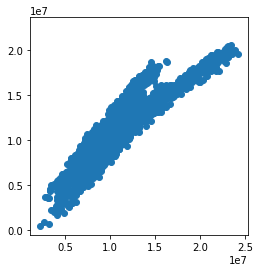

In [ ]:
plt.scatter(y_test,p)
plt.xlabel=('True_vals')
plt.ylabel=('Predicted')
plt.axis('equal')
plt.axis('square')



In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [ ]:
cv = ShuffleSplit(n_splits=18,test_size=0.7,random_state=5)

In [ ]:
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.82551317, 0.82372704, 0.82640288, 0.82613702, 0.82407209,
       0.82171795, 0.82682389, 0.82276905, 0.82449906, 0.82222811,
       0.82542989, 0.82611403, 0.82383706, 0.8266053 , 0.82457909,
       0.82257818, 0.82672258, 0.82569525])